In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import h5py

import pandas as pd
from tqdm import tqdm
from scipy.signal import savgol_filter

import sys
sys.path.append('../')
from tracker import loadAntData, pltsaveall

From tracker/_init__.py:
SLEAP not detected; make sure to install SLEAP if intending to use postprocessing notebook. Otherwise, ignore this message.


In [2]:
dataFile = '/home/jack/Workspaces/data/ant_tracking/ant_dataset_1_2026-01-01.h5'

minimumLength = 20 # seconds
smoothingWindow = 10 # frames
maximumTimeSkip = 10 # frames

excludeOutliers = True
excludeShortSegments = False
excludeObjects = True

padding = None # mm
inversePadding = None # mm

dataArr, timeArr, metadataArr = loadAntData(dataFile, minimumLength=minimumLength,
                                            smoothingWindow=smoothingWindow, maximumTimeSkip=maximumTimeSkip,
                                            excludeOutliers=excludeOutliers, excludeShortSegments=excludeShortSegments,
                                            excludeObjects=excludeObjects,
                                            borderPadding=padding, inverseBorderPadding=inversePadding,
                                            debug=True)

Loading SLEAP data: 100%|██████████████████| 1434/1434 [00:01<00:00, 846.00it/s]

Loaded 1313 segments!


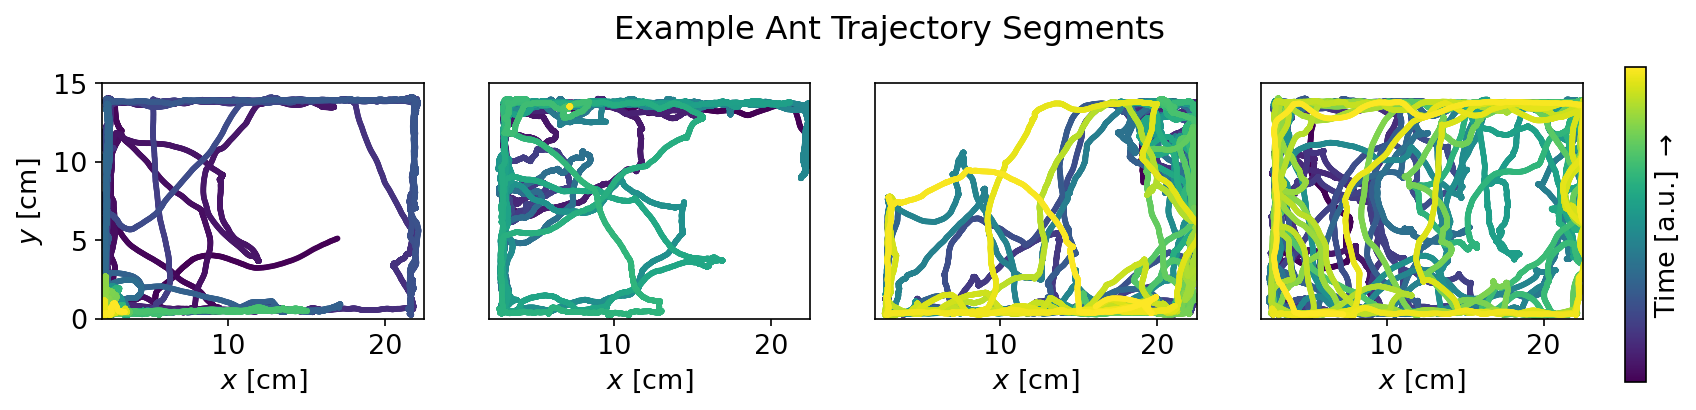

In [4]:
testIndices = [9, 5, 6, 7]
cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig, ax = plt.subplots(1, len(testIndices), figsize=(len(testIndices)*3.5, 3.5))

for i in range(len(testIndices)):
    ax[i].scatter(*(dataArr[testIndices[i]]/10).T, c=cmap(np.arange(len(dataArr[testIndices[i]])) / len(dataArr[testIndices[i]])), s=3, rasterized=True)

    ax[i].set_xlim([2, 22.5])
    ax[i].set_ylim([0, 15])
    ax[i].set_aspect(1)
    ax[i].set_xlabel('$x$ [cm]')
    if i > 0:
        ax[i].set_yticks([])
    else:
        ax[i].set_ylabel('$y$ [cm]')

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.6])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax,
             label='Time [a.u.] $\\rightarrow$', orientation='vertical')
cbar.ax.set_yticklabels([])
cbar.ax.set_yticks([])

#fig.tight_layout()
#fig.suptitle('Example Ant Trajectory Segments (Simulated)', y=0.85)
fig.suptitle('Example Ant Trajectory Segments', y=0.85)
#pltsaveall('simulated/02_ExampleSegments')
plt.show()

## Examine full trajectories

Number of segments in this trial: 23


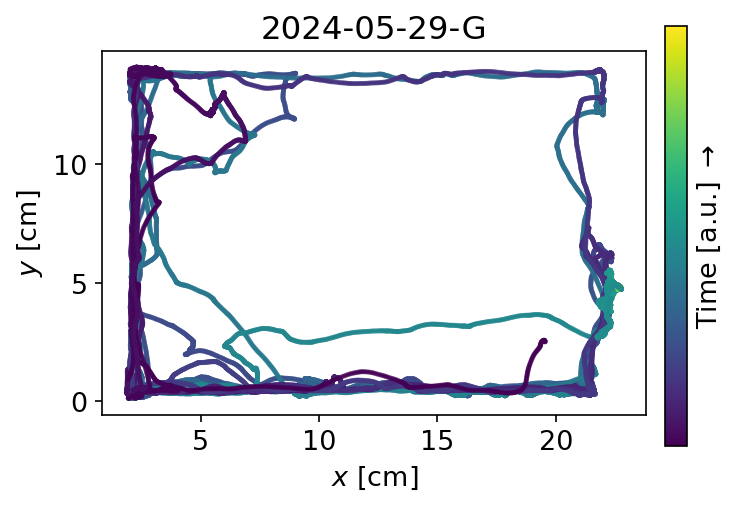

In [11]:
uniqueTrials = np.sort(np.unique([m["dataset"] for m in metadataArr]))
trialIndex = 10

cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(vmin=0, vmax=1)

indexDict = dict(zip(uniqueTrials, np.arange(len(uniqueTrials))))

segmentTrialIdentity = np.array([indexDict[metadataArr[l]["dataset"]] for l in range(len(dataArr))])
maxTime = np.max([timeArr[i][-1] for i in np.where(segmentTrialIdentity == trialIndex)[0]])

print(f'Number of segments in this trial: {len(np.where(segmentTrialIdentity == trialIndex)[0])}')

for i in np.where(segmentTrialIdentity == trialIndex)[0]:
    plt.scatter(*dataArr[i].T / 10, c=cmap(timeArr[i] / maxTime), s=2, alpha=0.6, rasterized=True)


plt.xlabel('$x$ [cm]')
plt.ylabel('$y$ [cm]')
plt.gca().set_aspect(1)
plt.title(uniqueTrials[trialIndex])
#plt.title('Simulated ant trajectory')

fig = plt.gcf()

#fig.tight_layout()

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.875, 0.14, 0.03, 0.7])

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                    cax=cbar_ax,
                    label='Time [a.u.] $\\rightarrow$', orientation='vertical')

cbar.ax.set_yticklabels([])
cbar.ax.set_yticks([])
fig.set_size_inches((5,4))
#plt.savefig('simulated_trajectory.pdf', bbox_inches='tight')
plt.show()